In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
BAN_UNSAM=pd.read_csv('./BrainAgeNeXt/BAN_UNSAM.csv')
BAN_ADNI=pd.read_csv('./BrainAgeNeXt/BAN_ADNI.csv')
BAN_RRIB=pd.read_csv('./BrainAgeNeXt/BAN_RRIB.csv')
BAN_JUK=pd.read_csv('./BrainAgeNeXt/BAN_JUK.csv')

DBN_UNSAM=pd.read_csv('./DeepBrainNet/DBN_UNSAM_BET.csv')
DBN_ADNI=pd.read_csv('./DeepBrainNet/DBN_ADNI_BET.csv')
DBN_RRIB=pd.read_csv('./DeepBrainNet/DBN_RRIB_BET.csv')
DBN_JUK=pd.read_csv('./DeepBrainNet/DBN_JUK_BET.csv')

pyment_UNSAM=pd.read_csv('./pyment/pyment_UNSAM.csv')
pyment_ADNI=pd.read_csv('./pyment/pyment_ADNI.csv')
pyment_RRIB=pd.read_csv('./pyment/pyment_RRIB.csv')
pyment_JUK=pd.read_csv('./pyment/pyment_JUK.csv')

ENIGMA_UNSAM=pd.read_csv('./ENIGMA/ENIGMA_UNSAM.csv')
ENIGMA_ADNI=pd.read_csv('./ENIGMA/ENIGMA_ADNI.csv')
ENIGMA_JUK= pd.read_csv('./ENIGMA/ENIGMA_JUK.csv')
ENIGMA_RRIB=pd.read_csv('./ENIGMA/ENIGMA_RRIB.csv')


In [3]:
# filter only controls
BAN_ADNI=BAN_ADNI[BAN_ADNI['Group']=='CN']
DBN_ADNI=DBN_ADNI[DBN_ADNI['Group']=='CN']
pyment_ADNI=pyment_ADNI[pyment_ADNI['Group']=='CN']
ENIGMA_ADNI=ENIGMA_ADNI[ENIGMA_ADNI['Group']=='CN']

BAN_UNSAM=BAN_UNSAM[BAN_UNSAM['Grupo']=='CONTROL']
DBN_UNSAM=DBN_UNSAM[DBN_UNSAM['Grupo']=='CONTROL']
pyment_UNSAM=pyment_UNSAM[pyment_UNSAM['Grupo']=='CONTROL']
ENIGMA_UNSAM=ENIGMA_UNSAM[ENIGMA_UNSAM['Grupo']=='CONTROL']

pyment_ADNI=pyment_ADNI[pyment_ADNI['prediction']<500]
pyment_RRIB=pyment_RRIB[pyment_RRIB['prediction']<500]
DBN_ADNI=DBN_ADNI[DBN_ADNI['Pred_Age']<500]

In [4]:
BAN_UNSAM['mean']=(BAN_UNSAM['Edad']+BAN_UNSAM['Predicted_Brain_Age'])/2
BAN_ADNI['mean']=(BAN_ADNI['Age']+BAN_ADNI['Predicted_Brain_Age'])/2
BAN_RRIB['mean']=(BAN_RRIB['age']+BAN_RRIB['Predicted_Brain_Age'])/2
BAN_JUK['mean']=(BAN_JUK['age']+BAN_JUK['Predicted_Brain_Age'])/2

DBN_UNSAM['mean']=(DBN_UNSAM['Edad']+DBN_UNSAM['Pred_Age'])/2
DBN_ADNI['mean']=(DBN_ADNI['Age']+DBN_ADNI['Pred_Age'])/2
DBN_RRIB['mean']=(DBN_RRIB['age']+DBN_RRIB['Pred_Age'])/2
DBN_JUK['mean']=(DBN_JUK['age']+DBN_JUK['Pred_Age'])/2

pyment_UNSAM['mean']=(pyment_UNSAM['Edad']+pyment_UNSAM['prediction'])/2
pyment_ADNI['mean']=(pyment_ADNI['Age']+pyment_ADNI['prediction'])/2
pyment_RRIB['mean']=(pyment_RRIB['age']+pyment_RRIB['prediction'])/2
pyment_JUK['mean']=(pyment_JUK['age']+pyment_JUK['prediction'])/2

ENIGMA_UNSAM['mean']=(ENIGMA_UNSAM['Edad']+ENIGMA_UNSAM['prediction'])/2
ENIGMA_ADNI['mean']=(ENIGMA_ADNI['Age']+ENIGMA_ADNI['prediction'])/2
ENIGMA_RRIB['mean']=(ENIGMA_RRIB['age']+ENIGMA_RRIB['prediction'])/2
ENIGMA_JUK['mean']=(ENIGMA_JUK['age']+ENIGMA_JUK['prediction'])/2

In [5]:
BAN_UNSAM['Dataset']='UNSAM'
BAN_ADNI['Dataset']='ADNI'
BAN_JUK['Dataset']='JUK'
BAN_RRIB['Dataset']='RRIB'
BAN_JUK['Group']='CN'
BAN_RRIB['Group']='CN'

BAN_ADNI=BAN_ADNI[['ID','Sex','Age','Predicted_Brain_Age','mean','Error','Absolute_Error','Dataset','Group']]
BAN_UNSAM.rename(columns={'Genero':'Sex','Edad':'Age','Grupo':'Group'}, inplace=True)
BAN_UNSAM=BAN_UNSAM[['ID','Sex','Age','Predicted_Brain_Age','mean','Error','Absolute_Error','Dataset','Group']]
BAN_JUK.rename(columns={'age':'Age','sex':'Sex'}, inplace=True)
BAN_JUK=BAN_JUK[['ID','Sex','Age','Predicted_Brain_Age','mean','Error','Absolute_Error','Dataset','Group']]
BAN_RRIB.rename(columns={'sex':'Sex','age':'Age'}, inplace=True)
BAN_RRIB=BAN_RRIB[['ID','Sex','Age','Predicted_Brain_Age','mean','Error','Absolute_Error','Dataset','Group']]

BAN_all = pd.concat([BAN_UNSAM, BAN_ADNI, BAN_JUK, BAN_RRIB], ignore_index=True)
BAN_all['Sex'].replace({'m':'M','f':'F'}, inplace=True)
BAN_all['Group'].replace({'CONTROL':'CN'}, inplace=True)

C:\Users\parri\AppData\Local\Temp\ipykernel_22632\595396895.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  BAN_all['Sex'].replace({'m':'M','f':'F'}, inplace=True)
C:\Users\parri\AppData\Local\Temp\ipykernel_22632\595396895.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [6]:
DBN_UNSAM['Dataset']='UNSAM'
DBN_ADNI['Dataset']='ADNI'
DBN_JUK['Dataset']='JUK'
DBN_RRIB['Dataset']='RRIB'
DBN_JUK['Group']='CN'
DBN_RRIB['Group']='CN'

DBN_UNSAM.rename(columns={'Edad':'Age','Genero':'Sex','Grupo':'Group'}, inplace=True)
DBN_UNSAM=DBN_UNSAM[['ID','Sex','Age','Pred_Age','mean','Error','Absolute_Error','Dataset','Group']]
DBN_ADNI.rename(columns={'Absolute_error':'Absolute_Error'}, inplace=True) 
DBN_ADNI=DBN_ADNI[['ID','Sex','Age','Pred_Age','mean','Error','Absolute_Error','Dataset','Group']]
DBN_JUK.rename(columns={'age':'Age','sex':'Sex','Absolute_error':'Absolute_Error'}, inplace=True)
DBN_JUK=DBN_JUK[['ID','Sex','Age','Pred_Age','mean','Error','Absolute_Error','Dataset','Group']]
DBN_RRIB.rename(columns={'age':'Age','sex':'Sex','Absolute_error':'Absolute_Error'}, inplace=True)
DBN_RRIB=DBN_RRIB[['ID','Sex','Age','Pred_Age','mean','Error','Absolute_Error','Dataset']]

DBN_all = pd.concat([DBN_UNSAM, DBN_ADNI, DBN_JUK, DBN_RRIB], ignore_index=True)
DBN_all['Sex'].replace({'m':'M','f':'F'}, inplace=True)
DBN_all['Group'].replace({'CONTROL':'CN'}, inplace=True)

C:\Users\parri\AppData\Local\Temp\ipykernel_22632\902361297.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DBN_all['Sex'].replace({'m':'M','f':'F'}, inplace=True)
C:\Users\parri\AppData\Local\Temp\ipykernel_22632\902361297.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [7]:
pyment_UNSAM['Dataset']='UNSAM'
pyment_ADNI['Dataset']='ADNI'
pyment_JUK['Dataset']='JUK'
pyment_RRIB['Dataset']='RRIB'
pyment_JUK['Group']='CN'
pyment_RRIB['Group']='CN'

pyment_UNSAM.rename(columns={'Edad':'Age','Genero':'Sex','Grupo':'Group'}, inplace=True)
pyment_UNSAM=pyment_UNSAM[['ID','Sex','Age','prediction','mean','Error','Absolute_Error','Dataset','Group']]
pyment_ADNI=pyment_ADNI[['ID','Sex','Age','prediction','mean','Error','Absolute_Error','Dataset','Group']]
pyment_JUK.rename(columns={'age':'Age','sex':'Sex'}, inplace=True)
pyment_JUK=pyment_JUK[['ID','Sex','Age','prediction','mean','Error','Absolute_Error','Dataset','Group']]
pyment_RRIB.rename(columns={'age':'Age','sex':'Sex'}, inplace=True)
pyment_RRIB=pyment_RRIB[['ID','Sex','Age','prediction','mean','Error','Absolute_Error','Dataset','Group']]
pyment_all = pd.concat([pyment_UNSAM, pyment_ADNI, pyment_JUK, pyment_RRIB], ignore_index=True)
pyment_all['Sex'].replace({'m':'M','f':'F'}, inplace=True)
pyment_all['Group'].replace({'CONTROL':'CN'}, inplace=True)

C:\Users\parri\AppData\Local\Temp\ipykernel_22632\430012273.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pyment_all['Sex'].replace({'m':'M','f':'F'}, inplace=True)
C:\Users\parri\AppData\Local\Temp\ipykernel_22632\430012273.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [8]:
ENIGMA_UNSAM['Dataset']='UNSAM'
ENIGMA_ADNI['Dataset']='ADNI'
ENIGMA_JUK['Dataset']='JUK'
ENIGMA_RRIB['Dataset']='RRIB'
ENIGMA_JUK['Group']='CN'
ENIGMA_RRIB['Group']='CN'

ENIGMA_UNSAM.rename(columns={'Edad':'Age','Absolute Error':'Absolute_Error','Grupo':'Group'}, inplace=True)
ENIGMA_UNSAM=ENIGMA_UNSAM[['ID','Age','prediction','mean','Absolute_Error','Error','Dataset','Group']]
ENIGMA_ADNI.rename(columns={'Absolute Error':'Absolute_Error'}, inplace=True)
ENIGMA_ADNI=ENIGMA_ADNI[['ID','Age','prediction','mean','Absolute_Error','Error','Dataset','Group']]
ENIGMA_JUK.rename(columns={'age':'Age','participant_id':'ID','sex':'Sex','Absolute Error':'Absolute_Error'}, inplace=True)
ENIGMA_JUK=ENIGMA_JUK[['ID','Age','prediction','mean','Absolute_Error','Error','Dataset','Group']]
ENIGMA_RRIB.rename(columns={'age':'Age','sex':'Sex','Absolute Error':'Absolute_Error','participant_id':'ID'}, inplace=True)
ENIGMA_RRIB=ENIGMA_RRIB[['ID','Age','prediction','mean','Absolute_Error','Error','Dataset','Group']]

ENIGMA_all = pd.concat([ENIGMA_UNSAM, ENIGMA_ADNI, ENIGMA_JUK, ENIGMA_RRIB], ignore_index=True)
ENIGMA_all['Group'].replace({'CONTROL':'CN'}, inplace=True)

C:\Users\parri\AppData\Local\Temp\ipykernel_22632\2409451838.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ENIGMA_all['Group'].replace({'CONTROL':'CN'}, inplace=True)


In [9]:
#BAN 
mean_diff_BAN=np.mean(BAN_all['Error'])
std_diff_BAN=np.std(BAN_all['Error'])
#intervalo de confianza del 95%
upper_limit_BAN = mean_diff_BAN + 1.96 * std_diff_BAN
lower_limit_BAN = mean_diff_BAN - 1.96 * std_diff_BAN

#DBN
mean_diff_DBN=np.mean(DBN_all['Error'])
std_diff_DBN=np.std(DBN_all['Error'])
#intervalo de confianza del 95%
upper_limit_DBN = mean_diff_DBN + 1.96 * std_diff_DBN
lower_limit_DBN = mean_diff_DBN - 1.96 * std_diff_DBN

#pyment
mean_diff_pyment=np.mean(pyment_all['Error'])
std_diff_pyment=np.std(pyment_all['Error'])
#intervalo de confianza del 95%
upper_limit_pyment = mean_diff_pyment + 1.96 * std_diff_pyment
lower_limit_pyment = mean_diff_pyment - 1.96 * std_diff_pyment

#ENIGMA
mean_diff_ENIGMA=np.mean(ENIGMA_all['Error'])
std_diff_ENIGMA=np.std(ENIGMA_all['Error'])
#intervalo de confianza del 95%
upper_limit_ENIGMA = mean_diff_ENIGMA + 1.96 * std_diff_ENIGMA
lower_limit_ENIGMA = mean_diff_ENIGMA - 1.96 * std_diff_ENIGMA

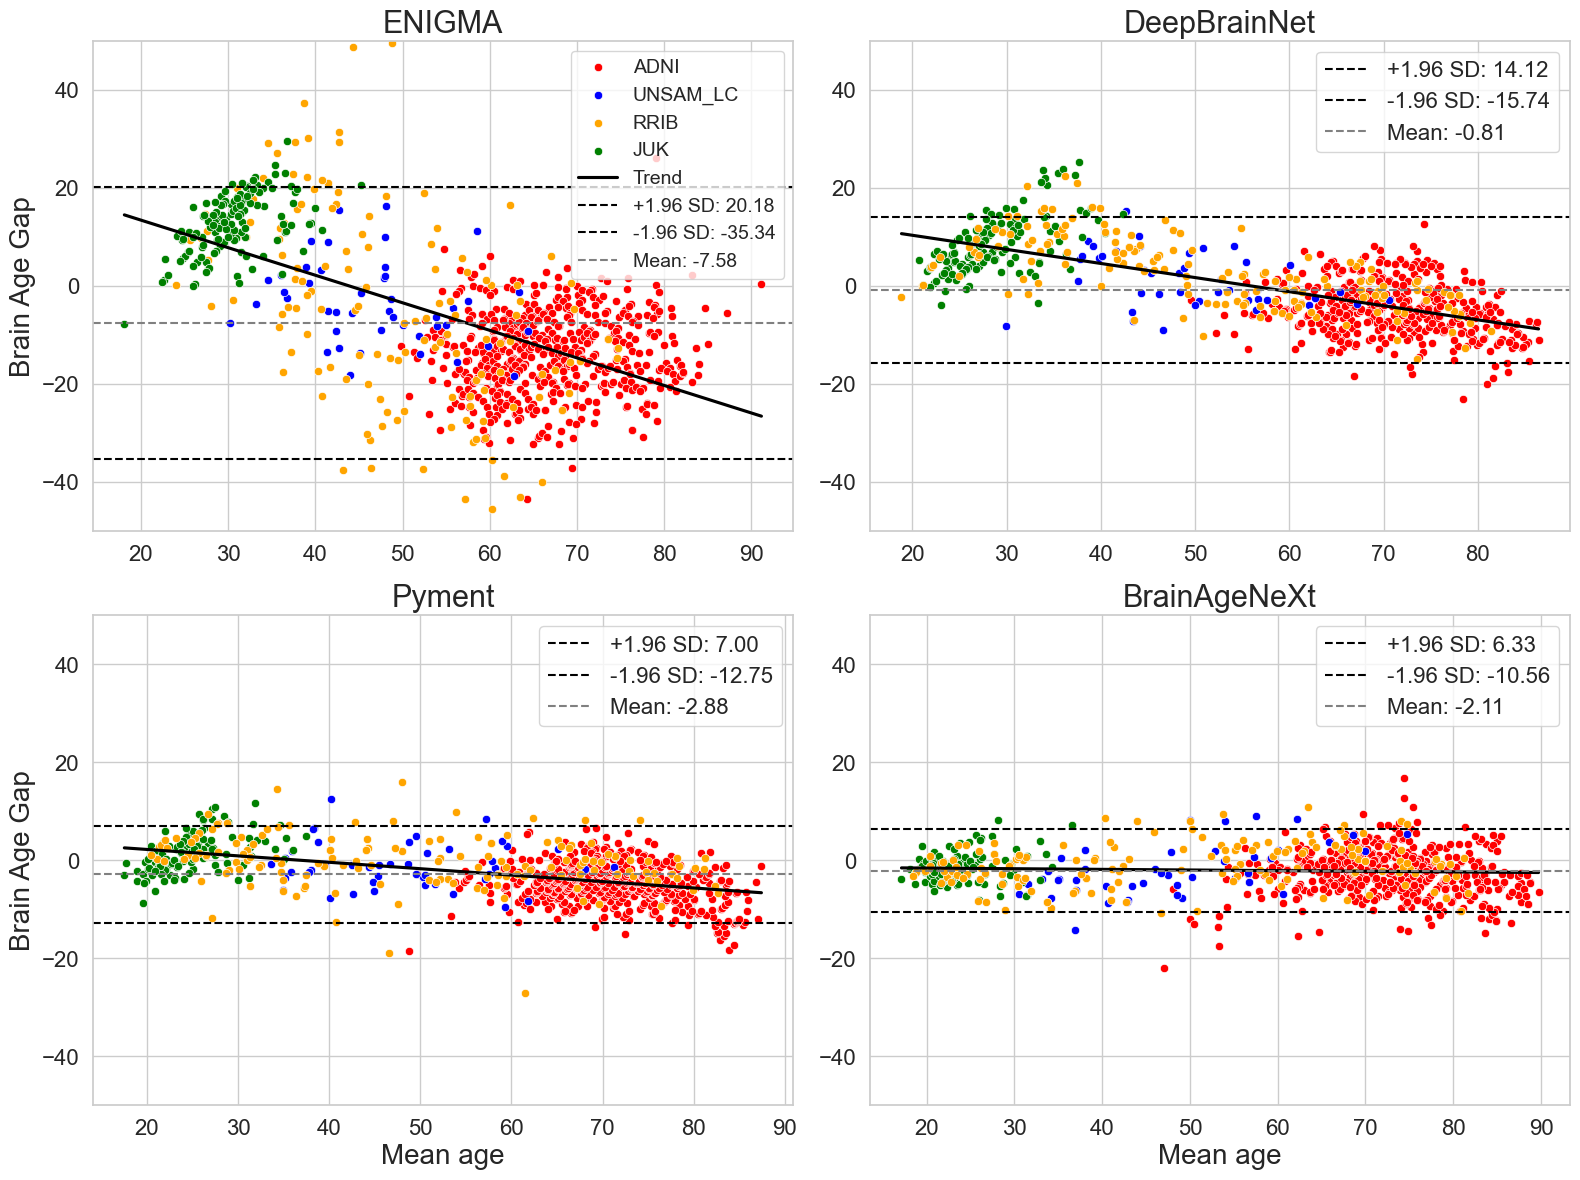

In [10]:
sns.set(style="whitegrid", font_scale=1.1)

# Crear figura y ejes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# ---- Configurar cada subplot ----

# 1. BrainAgeNeXt
axes[3].set_title('BrainAgeNeXt',fontsize=22)
sns.scatterplot(ax=axes[3], data=BAN_ADNI, x='mean', y='Error', color='red')
sns.scatterplot(ax=axes[3], data=BAN_UNSAM, x='mean', y='Error', color='blue')
sns.regplot(ax=axes[3], data=BAN_all, x='mean', y='Error', scatter=False, color='black', ci=None)
sns.scatterplot(ax=axes[3], data=BAN_JUK, x='mean', y='Error', color='green')
sns.scatterplot(ax=axes[3], data=BAN_RRIB, x='mean', y='Error', color='orange')
#grafico de upper y lower limit
axes[3].axhline(upper_limit_BAN, color='black', linestyle='--',label=f'+1.96 SD: {upper_limit_BAN:.2f}')
axes[3].axhline(lower_limit_BAN, color='black', linestyle='--', label=f'-1.96 SD: {lower_limit_BAN:.2f}')
axes[3].axhline(mean_diff_BAN, color='gray', linestyle='--', label=f'Mean: {mean_diff_BAN:.2f}')
axes[3].set_xlabel('Mean age',fontsize=20)
axes[3].set_ylabel('')
axes[3].legend(fontsize=16)

# 2. DeepBrainNet
axes[1].set_title('DeepBrainNet',fontsize=22)
sns.scatterplot(ax=axes[1], data=DBN_ADNI, x='mean', y='Error', color='red')
sns.scatterplot(ax=axes[1], data=DBN_UNSAM, x='mean', y='Error', color='blue')
sns.regplot(ax=axes[1], data=DBN_all, x='mean', y='Error', scatter=False, color='black', ci=None)
sns.scatterplot(ax=axes[1], data=DBN_JUK, x='mean', y='Error', color='green')
sns.scatterplot(ax=axes[1], data=DBN_RRIB, x='mean', y='Error', color='orange')
axes[1].axhline(upper_limit_DBN, color='black', linestyle='--', label=f'+1.96 SD: {upper_limit_DBN:.2f}')
axes[1].axhline(lower_limit_DBN, color='black', linestyle='--', label=f'-1.96 SD: {lower_limit_DBN:.2f}')
axes[1].axhline(mean_diff_DBN, color='gray', linestyle='--', label=f'Mean: {mean_diff_DBN:.2f}')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].legend(fontsize=16)

# 3. pyment
axes[2].set_title('Pyment',fontsize=22)
sns.scatterplot(ax=axes[2], data=pyment_ADNI, x='mean', y='Error', color='red')
sns.scatterplot(ax=axes[2], data=pyment_UNSAM, x='mean', y='Error', color='blue')
sns.regplot(ax=axes[2], data=pyment_all, x='mean', y='Error', scatter=False, color='black', ci=None)
sns.scatterplot(ax=axes[2], data=pyment_JUK, x='mean', y='Error', color='green')
sns.scatterplot(ax=axes[2], data=pyment_RRIB, x='mean', y='Error', color='orange')
axes[2].axhline(upper_limit_pyment, color='black', linestyle='--', label=f'+1.96 SD: {upper_limit_pyment:.2f}')
axes[2].axhline(lower_limit_pyment, color='black', linestyle='--', label=f'-1.96 SD: {lower_limit_pyment:.2f}')
axes[2].axhline(mean_diff_pyment, color='gray', linestyle='--', label=f'Mean: {mean_diff_pyment:.2f}')
axes[2].set_xlabel('Mean age', fontsize=20 )
axes[2].set_ylabel('Brain Age Gap',fontsize=20)
axes[2].legend(fontsize=16)

# 4. ENIGMA
axes[0].set_title('ENIGMA',fontsize=22)
sns.scatterplot(ax=axes[0], data=ENIGMA_ADNI, x='mean', y='Error', color='red', label='ADNI')
sns.scatterplot(ax=axes[0], data=ENIGMA_UNSAM, x='mean', y='Error', color='blue', label='UNSAM_LC')
sns.scatterplot(ax=axes[0], data=ENIGMA_RRIB, x='mean', y='Error', color='orange', label='RRIB')
sns.scatterplot(ax=axes[0], data=ENIGMA_JUK, x='mean', y='Error', color='green', label='JUK')
sns.regplot(ax=axes[0], data=ENIGMA_all, x='mean', y='Error', scatter=False, color='black', ci=None,label='Trend')
axes[0].axhline(upper_limit_ENIGMA, color='black', linestyle='--', label=f'+1.96 SD: {upper_limit_ENIGMA:.2f}')
axes[0].axhline(lower_limit_ENIGMA, color='black', linestyle='--', label=f'-1.96 SD: {lower_limit_ENIGMA:.2f}')
axes[0].axhline(mean_diff_ENIGMA, color='gray', linestyle='--', label=f'Mean: {mean_diff_ENIGMA:.2f}')
axes[0].set_xlabel('')
axes[0].set_ylabel('Brain Age Gap',fontsize=20)
axes[0].legend(fontsize=14)

# Etiquetas comunes
for ax in axes:
    #ax.set_xlabel('Mean Age')
    #ax.set_ylabel('Error')
    ax.grid(True)
    ax.set_ylim(-50, 50)
    ax.tick_params(axis='both', labelsize=16)  # Cambia 16 por el tamaño que prefieras

plt.tight_layout()
plt.show()


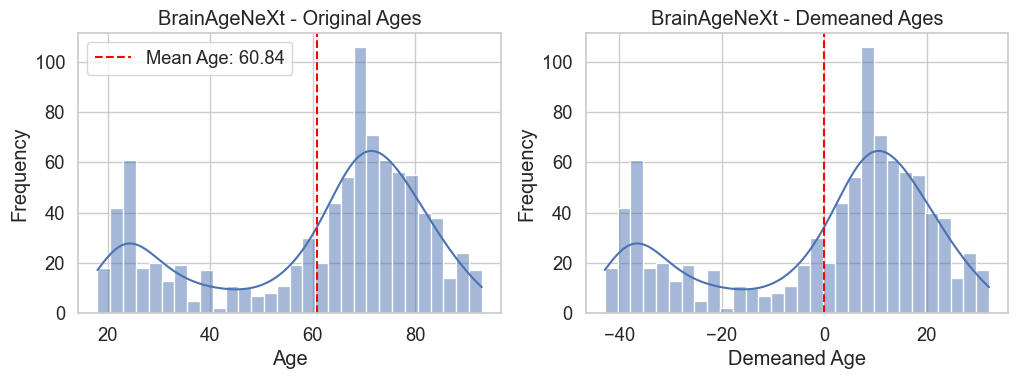

In [11]:
BAN_all=BAN_all[['ID','Age','mean','Error','Dataset','Predicted_Brain_Age']].rename(columns={'Predicted_Brain_Age':'prediction'})
DBN_all=DBN_all[['ID','Age','mean','Error','Dataset','Pred_Age']].rename(columns={'Pred_Age':'prediction'})
pyment_all=pyment_all[['ID','Age','mean','Error','Dataset','prediction']]
ENIGMA_all=ENIGMA_all[['ID','Age','mean','Error','Dataset','prediction']]

BAN_CA_mean=np.mean(BAN_all['Age'])
DBN_CA_mean=np.mean(DBN_all['Age'])
pyment_CA_mean=np.mean(pyment_all['Age'])
ENIGMA_CA_mean=np.mean(ENIGMA_all['Age'])

BAN_all['Corrected_age']=BAN_all['Age']-BAN_CA_mean
DBN_all['Corrected_age']=DBN_all['Age']-DBN_CA_mean
pyment_all['Corrected_age']=pyment_all['Age']-pyment_CA_mean
ENIGMA_all['Corrected_age']=ENIGMA_all['Age']-ENIGMA_CA_mean

# Plot histograms with demeaned ages:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid", font_scale=1.2)
# Histograma de edades originales
plt.subplot(2, 2, 1)
sns.histplot(BAN_all['Age'], bins=30, kde=True)
plt.title('BrainAgeNeXt - Original Ages')
plt.xlabel('Age')
plt.ylabel('Frequency') 
plt.axvline(BAN_CA_mean, color='red', linestyle='--', label=f'Mean Age: {BAN_CA_mean:.2f}')
plt.legend()
# Histograma de edades corregidas
plt.subplot(2, 2, 2)
sns.histplot(BAN_all['Corrected_age'], bins=30, kde=True)
plt.title('BrainAgeNeXt - Demeaned Ages')
plt.xlabel('Demeaned Age')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', label='Mean Demeaned Age: 0.00')

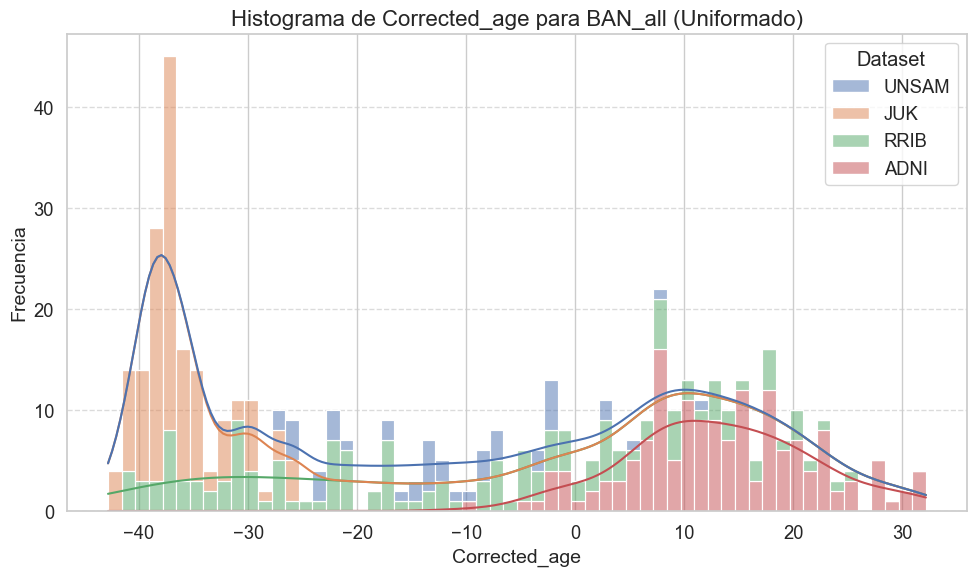

In [12]:
from sklearn.utils import resample

#aca lo que hago es refucir la cantidad de sujetos de ADNI para que sea igual a la de RRIB y tener distribuciones de edades mas uniformes (con enigma no lo hago)
target_size=158 #cantidad de sujetos de la base de datos RRIB

# Filtrar los datos de ADNI
adni_data = BAN_all[BAN_all['Dataset'] == 'ADNI']
#rrib_data = BAN_all[BAN_all['Dataset'] == 'RRIB']
#juk_data = BAN_all[BAN_all['Dataset'] == 'JUK']
# Seleccionar aleatoriamente sujetos de ADNI
adni_sampled = resample(adni_data, n_samples=target_size, random_state=42, replace=False)
#rrib_sampled = resample(rrib_data, n_samples=target_size, random_state=42, replace=False)
#juk_sampled = resample(juk_data, n_samples=target_size, random_state=42, replace=False)
# Combinar los datos restantes con los otros datasets
other_data = BAN_all[BAN_all['Dataset'] != 'ADNI']
BAN_all = pd.concat([other_data, adni_sampled], ignore_index=True)

# Filtrar los datos de ADNI
adni_data = pyment_all[pyment_all['Dataset'] == 'ADNI']
#rrib_data = pyment_all[pyment_all['Dataset'] == 'RRIB']
#juk_data = pyment_all[pyment_all['Dataset'] == 'JUK']
# Seleccionar aleatoriamente sujetos de ADNI
adni_sampled = resample(adni_data, n_samples=target_size, random_state=42, replace=False)
#rrib_sampled = resample(rrib_data, n_samples=target_size, random_state=42, replace=False)
#juk_sampled = resample(juk_data, n_samples=target_size, random_state=42, replace=False)
# Combinar los datos restantes con los otros datasets
other_data = pyment_all[pyment_all['Dataset'] != 'ADNI']
pyment_all = pd.concat([other_data, adni_sampled], ignore_index=True)

# Filtrar los datos de ADNI
adni_data = DBN_all[DBN_all['Dataset'] == 'ADNI']
#rrib_data = DBN_all[DBN_all['Dataset'] == 'RRIB']
#juk_data = DBN_all[DBN_all['Dataset'] == 'JUK']
# Seleccionar aleatoriamente sujetos de ADNI
adni_sampled = resample(adni_data, n_samples=target_size, random_state=42, replace=False)
#rrib_sampled = resample(rrib_data, n_samples=target_size, random_state=42, replace=False)
#juk_sampled = resample(juk_data, n_samples=target_size, random_state=42, replace=False)
# Combinar los datos restantes con los otros datasets
other_data = DBN_all[DBN_all['Dataset'] != 'ADNI']
DBN_all = pd.concat([other_data, adni_sampled], ignore_index=True)

# Filtrar los datos de ADNI
adni_data = ENIGMA_all[ENIGMA_all['Dataset'] == 'ADNI']
#rrib_data = ENIGMA_all[ENIGMA_all['Dataset'] == 'RRIB']
#juk_data = ENIGMA_all[ENIGMA_all['Dataset'] == 'JUK']
# Seleccionar aleatoriamente sujetos de ADNI
adni_sampled = resample(adni_data, n_samples=target_size, random_state=42, replace=False)
#rrib_sampled = resample(rrib_data, n_samples=target_size, random_state=42, replace=False)
#juk_sampled = resample(juk_data, n_samples=target_size, random_state=42, replace=False)
# Combinar los datos restantes con los otros datasets
other_data = ENIGMA_all[ENIGMA_all['Dataset'] != 'ADNI']
ENIGMA_all = pd.concat([other_data, adni_sampled], ignore_index=True)


# Verificar el nuevo histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=BAN_all, x='Corrected_age', bins=60, kde=True, hue='Dataset', multiple='stack')
plt.title('Histograma de Corrected_age para BAN_all (Uniformado)', fontsize=16)
plt.xlabel('Corrected_age', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

In [14]:
# Si tu dataframe se llama BAN_all:
model = smf.ols("Error ~ Corrected_age * C(Dataset, Treatment(reference='RRIB'))", data=BAN_all).fit()
model_reduced = smf.ols("Error ~ Corrected_age ", data=BAN_all).fit() #opcion 1
#model_reduced = smf.ols("Error ~ Dataset ", data=BAN_all).fit() #opcion 2

print(model.summary())

# R² total 
r2_full = model.rsquared 
# Modelo reducido sin dataset (solo mean) 
r2_reduced = model_reduced.rsquared 

# f² para la variable 
f2_variable = (r2_full - r2_reduced) / (1 - r2_full)
#0.02= small, 0.15=medium, 0.35=large 
print("\n f² de la variable:", f2_variable)

                            OLS Regression Results                            
Dep. Variable:                  Error   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     7.104
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           4.26e-08
Time:                        15:37:18   Log-Likelihood:                -1391.9
No. Observations:                 497   AIC:                             2800.
Df Residuals:                     489   BIC:                             2833.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [15]:
pyment_all[(pyment_all['mean'] > 20) & (pyment_all['mean'] <= 30)].groupby('Dataset')['Error'].mean()


Dataset
JUK     1.548692
RRIB    1.898292
Name: Error, dtype: float64

In [16]:
BAN_CA_mean

np.float64(60.84193194291987)